In [67]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import os

In [68]:
gbd = pd.read_csv('/Users/winky/Downloads/JupyterData/goodBellyData.csv')

gbd['Revenue'] = gbd['Units_Sold'] * gbd['Average_Retail_Price']
# these 3 columns are not included in Variable Definitions.
del gbd['Date']
del gbd['Store']
del gbd['Region']
gbd.head(5)

,Units_Sold,Average_Retail_Price,Sales_Rep,Endcap,Demo,Demo1_3,Demo4_5,Natural,Fitness,Revenue
0,150.702088,4.390000,0,0,0,0,0,1,0,661.582166
1,197.403797,3.997692,0,0,0,0,0,1,0,789.159643
2,235.106171,3.809231,0,0,0,0,0,1,0,895.573662
3,226.692427,3.835000,0,0,0,0,0,1,0,869.365459
4,257.688151,3.902500,0,0,0,0,0,1,0,1005.628008


In [69]:
gbd.columns = ['Unit', 'Price', 'Rep', 'Endcap', 'Demo', 'Demo1_3', 'Demo4_5','Natural','Fitness', 'Revenue']
gbd.head(5)

,Unit,Price,Rep,Endcap,Demo,Demo1_3,Demo4_5,Natural,Fitness,Revenue
0,150.702088,4.390000,0,0,0,0,0,1,0,661.582166
1,197.403797,3.997692,0,0,0,0,0,1,0,789.159643
2,235.106171,3.809231,0,0,0,0,0,1,0,895.573662
3,226.692427,3.835000,0,0,0,0,0,1,0,869.365459
4,257.688151,3.902500,0,0,0,0,0,1,0,1005.628008


In [70]:
# TotalSale and Unit are highly correlated, can't keep both
del gbd['Unit']

In [71]:
def backward_elimination(df, response):
    # first run a regression with all variables
    df_cp = df.copy()
    
    for i in range(gbd.shape[1]):
        formula = ''
        columns = list(df_cp.columns)
        columns.remove(response)
 
        for var in columns:
            formula += '+ %s' % var 
        formula = formula[1:]
        lm_all = smf.ols('%s ~ %s' % (response, formula), data = df_cp).fit()

        # extract pvalues and remove variables with the highest p-value
        pvalue_df = pd.DataFrame(lm_all.pvalues).reset_index()
        pvalue_df.columns = ['name', 'pvalue']
        pvalue_df = pvalue_df.loc[2:, :]
        pvalue_df = pvalue_df.sort_values('pvalue', ascending=False)
        pvalue_df = pvalue_df.reset_index(drop=True)

        if pvalue_df.pvalue[0] <= 0.05:
            formula = ''
            columns = list(df_cp.columns)
            columns.remove(response)

            for var in columns:
                formula += '+ %s' % var 
            formula = formula[1:]
            lm_all = smf.ols('%s ~ %s' % (response, formula), data = df_cp).fit()
            print(lm_all.summary())
            break
        else:
            var_to_remove = pvalue_df.name[0]
            del df_cp[var_to_remove]

In [72]:
backward_elimination(gbd, 'Revenue')

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     473.4
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:40:30   Log-Likelihood:                -9700.8
No. Observations:                1386   AIC:                         1.942e+04
Df Residuals:                    1379   BIC:                         1.945e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.2855     65.891      1.719      0.0

In [73]:
gbd = pd.read_csv('/Users/winky/Downloads/JupyterData/goodBellyData.csv')
del gbd['Date']
del gbd['Store']
del gbd['Region']
gbd.columns = ['Unit', 'Price', 'Rep', 'Endcap', 'Demo', 'Demo1_3', 'Demo4_5','Natural','Fitness']
backward_elimination(gbd, 'Unit')

                            OLS Regression Results                            
Dep. Variable:                   Unit   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     471.4
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:40:30   Log-Likelihood:                -7720.5
No. Observations:                1386   AIC:                         1.545e+04
Df Residuals:                    1379   BIC:                         1.549e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    294.1890     15.787     18.635      0.0

In [74]:
gbd = pd.read_csv('/Users/winky/Downloads/JupyterData/goodBellyData.csv')

gbd['Revenue'] = gbd['Units_Sold'] * gbd['Average_Retail_Price']
# these 3 columns are not included in Variable Definitions.
del gbd['Date']
del gbd['Store']
del gbd['Region']
del gbd['Natural']
del gbd['Fitness']
gbd.columns = ['Unit', 'Price', 'Rep', 'Endcap', 'Demo', 'Demo1_3', 'Demo4_5', 'Revenue']

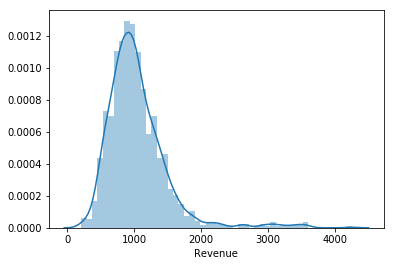

In [75]:
sns.distplot(gbd['Revenue']);

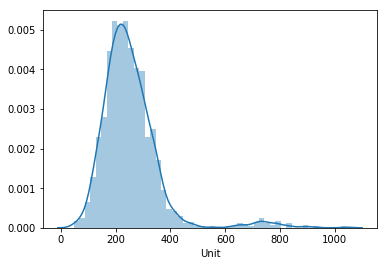

In [76]:
sns.distplot(gbd['Unit']);

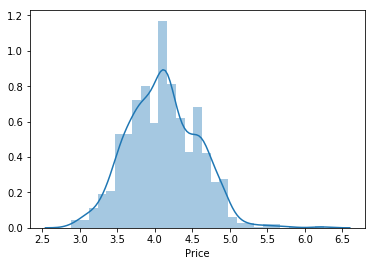

In [77]:
sns.distplot(gbd['Price']);

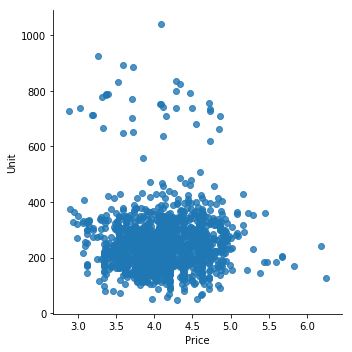

In [97]:
sns.lmplot("Price","Unit", data=gbd, ci = None, fit_reg=False)

In [79]:
# do a manual backward elimination on interaction terms
gbd_lm = smf.ols('Revenue ~ Rep*Endcap + Demo*Demo1_3*Demo4_5', data = gbd).fit()
print(gbd_lm.summary())
print("p-value: ")
print(gbd_lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     452.7
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:40:31   Log-Likelihood:                -9466.3
No. Observations:                1386   AIC:                         1.895e+04
Df Residuals:                    1375   BIC:                         1.901e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              740.5352 

In [80]:
gbd_lm = smf.ols('Revenue ~ Rep*Endcap + Demo + Demo1_3 + Demo4_5 + Demo:Demo1_3 + Demo:Demo4_5 + Demo1_3:Demo4_5', data = gbd).fit()
print(gbd_lm.summary())
print("p-value: ")
print(gbd_lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     502.7
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:40:31   Log-Likelihood:                -9466.9
No. Observations:                1386   AIC:                         1.895e+04
Df Residuals:                    1376   BIC:                         1.901e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         740.8132      9.259     

In [81]:
gbd_lm = smf.ols('Revenue ~ Rep*Endcap + Demo + Demo1_3 + Demo4_5 + Demo:Demo1_3 + Demo:Demo4_5', data = gbd).fit()
print(gbd_lm.summary())
print("p-value: ")
print(gbd_lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     565.6
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:40:31   Log-Likelihood:                -9467.3
No. Observations:                1386   AIC:                         1.895e+04
Df Residuals:                    1377   BIC:                         1.900e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      741.3239      9.240     80.232   

In [82]:
gbd_lm = smf.ols('Revenue ~ Rep*Endcap + Demo + Demo1_3 + Demo4_5 + Demo:Demo1_3', data = gbd).fit()
print(gbd_lm.summary())
print("p-value: ")
print(gbd_lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     646.1
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:40:31   Log-Likelihood:                -9467.9
No. Observations:                1386   AIC:                         1.895e+04
Df Residuals:                    1378   BIC:                         1.899e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      741.0665      9.237     80.226   

In [83]:
gbd_lm = smf.ols('Revenue ~ Rep*Endcap + Demo + Demo1_3 + Demo4_5', data = gbd).fit()
print(gbd_lm.summary())
print("p-value: ")
print(gbd_lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     751.9
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:40:31   Log-Likelihood:                -9469.6
No. Observations:                1386   AIC:                         1.895e+04
Df Residuals:                    1379   BIC:                         1.899e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    740.0431      9.229     80.190      0.0

In [84]:
sm.stats.anova_lm(gbd_lm, typ = 1)

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
Rep,1.0,7.968761e+07,7.968761e+07,1574.624902,2.443134e-230
Endcap,1.0,7.798161e+07,7.798161e+07,1540.914470,6.721260e-227
Rep:Endcap,1.0,3.347834e+07,3.347834e+07,661.531022,1.728409e-119
Demo,1.0,1.425707e+07,1.425707e+07,281.719242,1.124896e-57
Demo1_3,1.0,1.247638e+07,1.247638e+07,246.532946,3.075190e-51
Demo4_5,1.0,1.043478e+07,1.043478e+07,206.190985,1.112268e-43
Residual,1379.0,6.978755e+07,5.060736e+04,NaN,NaN


In [85]:
sm.stats.anova_lm(gbd_lm, typ = 2)

,sum_sq,df,F,PR(>F)
Rep,3.862838e+07,1.0,763.295716,4.403602e-134
Endcap,6.757157e+07,1.0,1335.212265,5.223447e-205
Rep:Endcap,3.355910e+07,1.0,663.126846,1.007397e-119
Demo,1.523431e+07,1.0,301.029618,3.780393e-61
Demo1_3,1.297633e+07,1.0,256.411875,4.638657e-53
Demo4_5,1.043478e+07,1.0,206.190985,1.112268e-43
Residual,6.978755e+07,1379.0,NaN,NaN


In [86]:
gbd_lm = smf.ols('Unit ~ Rep*Endcap + Demo + Demo1_3 + Demo4_5', data = gbd).fit()
print(gbd_lm.summary())
print("p-value: ")
print(gbd_lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                   Unit   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     910.5
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:40:32   Log-Likelihood:                -7383.5
No. Observations:                1386   AIC:                         1.478e+04
Df Residuals:                    1379   BIC:                         1.482e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    189.5930      2.049     92.544      0.0

In [87]:
sm.stats.anova_lm(gbd_lm, typ = 2)

,sum_sq,df,F,PR(>F)
Rep,1.416073e+06,1.0,567.798110,2.196201e-105
Endcap,4.839248e+06,1.0,1940.376847,2.567464e-265
Rep:Endcap,2.366660e+06,1.0,948.951776,5.339381e-159
Demo,8.359936e+05,1.0,335.205524,3.375744e-67
Demo1_3,9.876153e+05,1.0,396.000742,1.158540e-77
Demo4_5,5.065055e+05,1.0,203.091772,4.315816e-43
Residual,3.439189e+06,1379.0,NaN,NaN


In [88]:
# assume rep and endcap don't have interaction term
gbd_lm = smf.ols('Revenue ~ Rep + Endcap + Demo*Demo1_3*Demo4_5', data = gbd).fit()
print(gbd_lm.summary())
print("p-value: ")
print(gbd_lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     291.6
Date:                Thu, 22 Mar 2018   Prob (F-statistic):          2.32e-311
Time:                        12:40:32   Log-Likelihood:                -9736.3
No. Observations:                1386   AIC:                         1.949e+04
Df Residuals:                    1376   BIC:                         1.954e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              710.2514 

In [89]:
gbd_lm = smf.ols('Revenue ~ Rep + Endcap + Demo + Demo1_3 + Demo4_5 + Demo:Demo1_3 + Demo:Demo4_5 + Demo1_3:Demo4_5', data = gbd).fit()
print(gbd_lm.summary())
print("p-value: ")
print(gbd_lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     327.5
Date:                Thu, 22 Mar 2018   Prob (F-statistic):          3.33e-312
Time:                        12:40:32   Log-Likelihood:                -9737.3
No. Observations:                1386   AIC:                         1.949e+04
Df Residuals:                    1377   BIC:                         1.954e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         710.6252     11.157     

In [90]:
gbd_lm = smf.ols('Revenue ~ Rep + Endcap + Demo + Demo1_3 + Demo4_5 + Demo:Demo1_3 + Demo:Demo4_5', data = gbd).fit()
print(gbd_lm.summary())
print("p-value: ")
print(gbd_lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     374.5
Date:                Thu, 22 Mar 2018   Prob (F-statistic):          1.86e-313
Time:                        12:40:32   Log-Likelihood:                -9737.4
No. Observations:                1386   AIC:                         1.949e+04
Df Residuals:                    1378   BIC:                         1.953e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      710.9715     11.131     63.873   

In [91]:
gbd_lm = smf.ols('Revenue ~ Rep + Endcap + Demo + Demo1_3 + Demo4_5 + Demo:Demo1_3', data = gbd).fit()
print(gbd_lm.summary())
print("p-value: ")
print(gbd_lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     436.2
Date:                Thu, 22 Mar 2018   Prob (F-statistic):          2.59e-314
Time:                        12:40:32   Log-Likelihood:                -9738.5
No. Observations:                1386   AIC:                         1.949e+04
Df Residuals:                    1379   BIC:                         1.953e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      710.4752     11.131     63.829   

In [92]:
gbd_lm = smf.ols('Unit ~ Rep + Endcap + Demo + Demo1_3 + Demo4_5', data = gbd).fit()
print(gbd_lm.summary())
print("p-value: ")
print(gbd_lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                   Unit   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     535.2
Date:                Thu, 22 Mar 2018   Prob (F-statistic):          6.22e-320
Time:                        12:40:32   Log-Likelihood:                -7746.4
No. Observations:                1386   AIC:                         1.550e+04
Df Residuals:                    1380   BIC:                         1.554e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    181.2434      2.637     68.718      0.0

In [93]:
gbd_lm = smf.ols('Revenue ~ Rep + Endcap + Demo + Demo1_3 + Demo4_5', data = gbd).fit()
print(gbd_lm.summary())
print("p-value: ")
print(gbd_lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     520.1
Date:                Thu, 22 Mar 2018   Prob (F-statistic):          2.57e-314
Time:                        12:40:32   Log-Likelihood:                -9741.7
No. Observations:                1386   AIC:                         1.950e+04
Df Residuals:                    1380   BIC:                         1.953e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    708.6014     11.128     63.679      0.0

In [94]:
gbd_lm = smf.ols('Unit ~ Rep + Endcap + Rep:Endcap + Price + Demo + Demo1_3 + Demo4_5', data = gbd).fit()
print(gbd_lm.summary())
print("p-value: ")
print(gbd_lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                   Unit   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     817.1
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:40:32   Log-Likelihood:                -7357.6
No. Observations:                1386   AIC:                         1.473e+04
Df Residuals:                    1378   BIC:                         1.477e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    276.5735     12.169     22.728      0.0

In [95]:
sm.stats.anova_lm(gbd_lm, typ = 2)

,sum_sq,df,F,PR(>F)
Rep,1.627912e+06,1.0,677.128794,9.317340e-122
Endcap,4.641594e+06,1.0,1930.667985,2.242068e-264
Rep:Endcap,2.279630e+06,1.0,948.210549,7.049985e-159
Price,1.262856e+05,1.0,52.528429,7.039120e-13
Demo,8.432156e+05,1.0,350.734937,6.686836e-70
Demo1_3,9.125070e+05,1.0,379.556671,7.312994e-75
Demo4_5,5.260949e+05,1.0,218.828825,4.566172e-46
Residual,3.312904e+06,1378.0,NaN,NaN


In [96]:
gbd_lm = smf.ols('Unit ~ Rep + Endcap + Price + Demo + Demo1_3 + Demo4_5', data = gbd).fit()
print(gbd_lm.summary())
print("p-value: ")
print(gbd_lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                   Unit   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     471.4
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:40:32   Log-Likelihood:                -7720.5
No. Observations:                1386   AIC:                         1.545e+04
Df Residuals:                    1379   BIC:                         1.549e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    294.1890     15.787     18.635      0.0